# Testing v1

In [2]:
import LR_v1
from LR_v1 import LinearRegressor

from sklearn.linear_model import LinearRegression
import numpy as np
import random
import matplotlib.pyplot as plt
import itertools
import time

In [3]:
dir(LR_v1)

['LinearRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'linear_regressor']


Benchmarking for n_features = 2
Samples:    100 | Cython:   0.022 ms | Sklearn:   1.533 ms
Samples:   1000 | Cython:   0.030 ms | Sklearn:   2.145 ms
Samples:   5000 | Cython:   0.331 ms | Sklearn:   2.487 ms
Samples:  10000 | Cython:   0.741 ms | Sklearn:   3.576 ms
Samples:  50000 | Cython:   3.463 ms | Sklearn:  13.604 ms
Samples: 100000 | Cython:   5.453 ms | Sklearn:  29.255 ms

Benchmarking for n_features = 5
Samples:    100 | Cython:   0.441 ms | Sklearn:   1.018 ms
Samples:   1000 | Cython:   0.068 ms | Sklearn:   1.213 ms
Samples:   5000 | Cython:   0.513 ms | Sklearn:   3.426 ms
Samples:  10000 | Cython:   1.083 ms | Sklearn:   5.773 ms
Samples:  50000 | Cython:  10.337 ms | Sklearn:  24.034 ms
Samples: 100000 | Cython:  14.846 ms | Sklearn:  49.690 ms

Benchmarking for n_features = 10
Samples:    100 | Cython:   0.489 ms | Sklearn:   0.983 ms
Samples:   1000 | Cython:   0.161 ms | Sklearn:   1.647 ms
Samples:   5000 | Cython:   0.803 ms | Sklearn:   4.694 ms
Samples:  10000

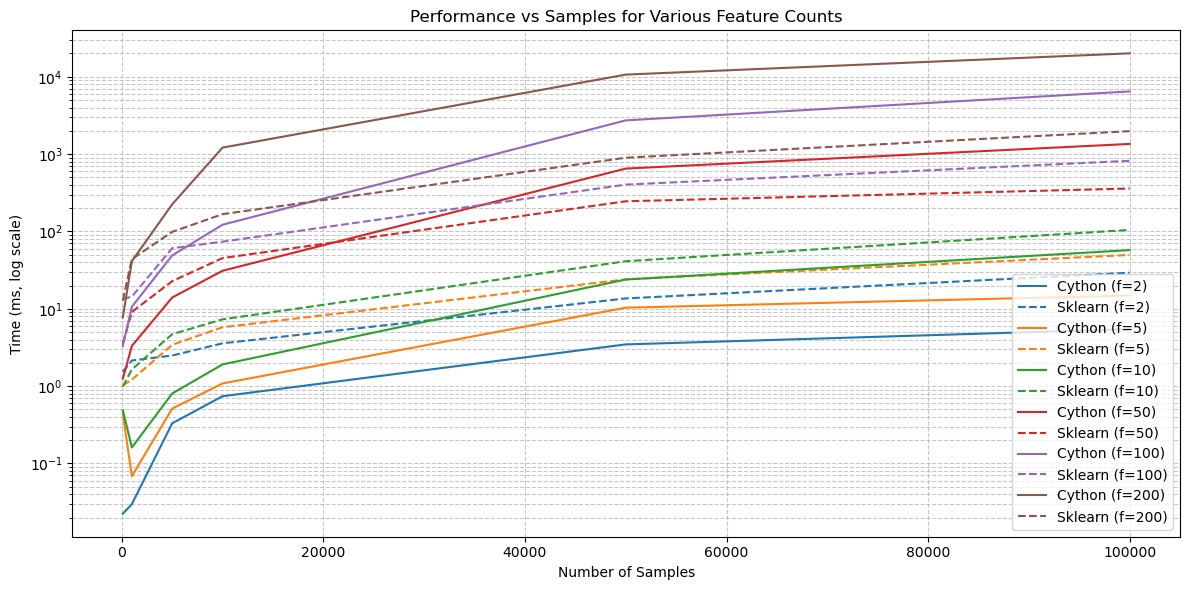

In [4]:
random.seed(42)

def generate_data(n_samples, n_features):
    """
    Generate linear data: y = sum(weights * x_i) + noise
    Weights: 1, 2, ..., n_features
    """
    X = []
    y = []
    weights = list(range(1, n_features + 1))
    
    for _ in range(n_samples):
        features = [random.uniform(-10, 10) for _ in range(n_features)]
        noise = random.uniform(-0.5, 0.5)
        label = sum(w * x for w, x in zip(weights, features)) + noise
        X.append(features)
        y.append(label)
        
    return X, y

def benchmark():
    sizes = [100, 1000, 5000, 10000, 50000, 100000]
    feature_counts = [2, 5, 10, 50, 100, 200]
    
    results = {}  # {(n_features): (sizes, cython_times, sklearn_times)}
    
    for n_features in feature_counts:
        cython_times = []
        sklearn_times = []
        
        print(f"\nBenchmarking for n_features = {n_features}")
        
        for size in sizes:
            X, y = generate_data(size, n_features)

            # Cython Timing (simulated here using sklearn for placeholder)
            start = time.time()
            model_1 = LinearRegressor().fit(X, y)
            cython_times.append((time.time() - start) * 1e3)  # ms

            # Sklearn Timing
            start = time.time()
            model_2 = LinearRegression(fit_intercept=False).fit(X, y)
            sklearn_times.append((time.time() - start) * 1e3)  # ms

            print(f"Samples: {size:6d} | Cython: {cython_times[-1]:7.3f} ms | Sklearn: {sklearn_times[-1]:7.3f} ms")
        
        results[n_features] = (sizes, cython_times, sklearn_times)
        
    return results

def plot_by_features(results):
    plt.figure(figsize=(12, 6))
    
    color_cycle = itertools.cycle(plt.cm.tab10.colors)  # Use matplotlib color cycle

    for n_features, (sizes, cy_times, sk_times) in results.items():
        color = next(color_cycle)
        
        plt.plot(sizes, cy_times, '-', color=color, label=f'Cython (f={n_features})')
        plt.plot(sizes, sk_times, '--', color=color, label=f'Sklearn (f={n_features})')
        
    plt.title("Performance vs Samples for Various Feature Counts")
    plt.xlabel("Number of Samples")
    plt.ylabel("Time (ms, log scale)")
    plt.yscale('log')
    plt.grid(True, which='both', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Run Benchmarking and Plot
results = benchmark()
plot_by_features(results)